In [19]:
import os
from skimage import io, img_as_float
import matplotlib.pyplot as plt

In [5]:
def sliding_window(img, step, window_size):
  # INPUT:
  # img = input image
  # step = the distance (in pixels, for both horizontal and vertical direction) 
  # between 2 windows
  # window_size = size of the sliding window, format: (pixels(y-axis),pixels(x-axis))
	
  # OUTPUT: (x,y,window)
  # x,y: the coordinates of the top left corner of the current window (in pixels) 
  # in the coordinate system of "img".
  # window: the current window, size = (window_size)

	for y in range(0, img.shape[0], step):
		for x in range(0, img.shape[1], step):
			yield (x, y, img[y:y + window_size[1], x:x + window_size[0]])

In [22]:
def image_crop(img_path,dir,step,size):
  # INPUT:
  # img_path = input image path to be cropped (from io.imread())
  # dir = directory for saving cropped images
  # step, size: parameters of "sliding_window()"

  # OUTPUT: images cropped from the image in img_path, saved to dir

  img = io.imread(img_path)
  if img is None:
    print("This is not an image")
  else:
    win_count = 0
    for (x,y,window) in sliding_window(img, step, size):
      if window.shape[0] != winH or window.shape[1] != winW:
        continue
      img_cropped_name = os.path.split(img_path)[1].split(".")[0] + "_%d"%win_count + ".png"
      save_path = os.path.join(dir,img_cropped_name)
      img_cropped = window
      io.imsave(save_path,img_cropped)
      win_count += 1
    print("Number of cropped images", win_count)
    

(252, 317, 4)


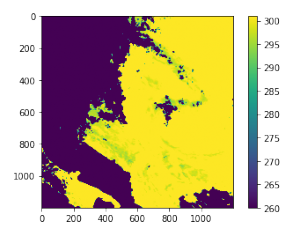

In [8]:
img = img_as_float(io.imread('test-img.png'))
plt.figure(figsize=(5, 5))
plt.axis('off')
plt.imshow(img)
print(img.shape)

### Test sliding_window()

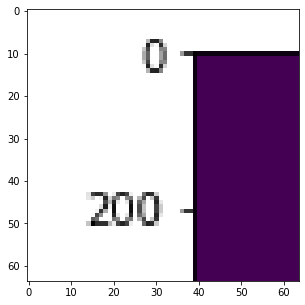

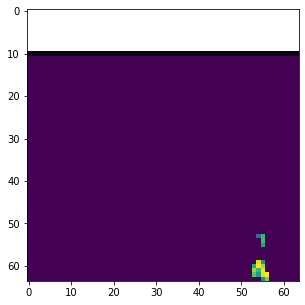

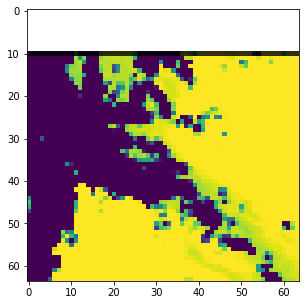

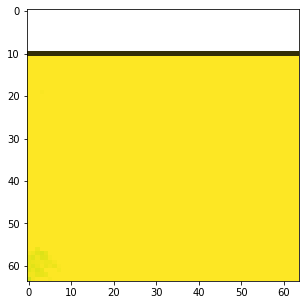

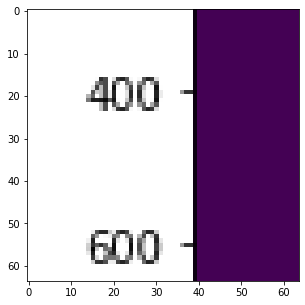

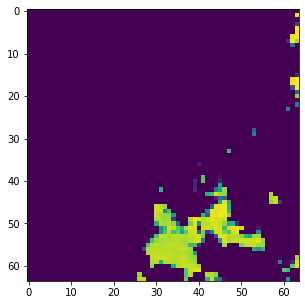

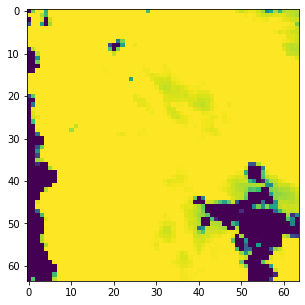

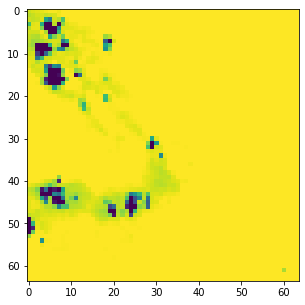

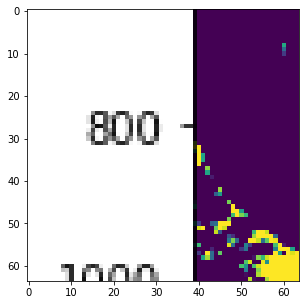

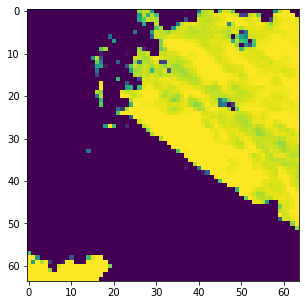

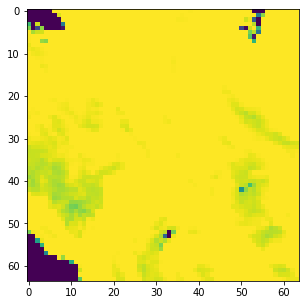

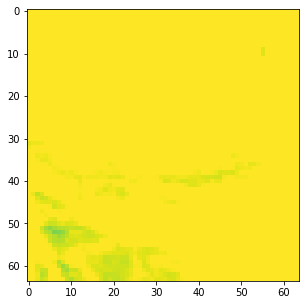

In [26]:
step = 64
count=0
(winW, winH) = (64,64)
for (x,y,window) in sliding_window(img1, step=step, window_size=(winW, winH)):
  if window.shape[0] != winH or window.shape[1] != winW:
			continue
  count += 1
  plt.figure(figsize=(5, 5))
  plt.imshow(window)

### Test image_crop()

In [24]:
img1 = io.imread('test-img.png')
image_crop('test-img.png',"/",64,(64,64))

Number of cropped images 12


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: /test-img_11.png is a low contrast image
